In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('./data_files/clean_data_with_orgs.csv', lineterminator='\n',index_col=0)
#data.shape

# Get ticker Mentions and Prices 

In [208]:
def get_prices(ticker):
    prices = pd.read_csv('../Yahoo finance Scripts/data/'+ticker+'.csv',index_col=0)
    prices.reset_index(level=0, inplace=True) 
    prices.rename(columns = {'index':'date'}, inplace = True)
    #prices = RBLX_prices.iloc[8:19]
    prices['date']= pd.to_datetime(prices['date'])
    return(prices)

In [215]:
#subreddits = ['wallstreetbets', 'stocks', 'investing', 'StockMarket','pennystocks','algotrading', 'RobinHood']
subreddits = ['wallstreetbets', 'stocks', 'investing', 'StockMarket']
mentions = pd.DataFrame()
def get_stats(ticker):
    df = pd.DataFrame()
    tickers = data[data['Organizations'].apply(lambda x: ticker in x)]
    tickers = tickers[['created','subreddit', 'Organizations']]
    for subreddit in subreddits:
        subreddits_grp = tickers.groupby(['subreddit'])
        mentions = subreddits_grp.get_group(subreddit)
        mentions = mentions['created'].value_counts()
        df[''+subreddit+''] = mentions
    # repace NaN with 0
    df = df.fillna(0)
    # combine and split subreddits
    df['all_minus_wsb'] = df['stocks'] + df['investing'] + df['StockMarket']
    df['all_combined'] = df['stocks'] + df['investing'] + df['StockMarket'] + df['wallstreetbets']
    # taking date out of index and casting it to date type for later merging
    df.reset_index(level=0, inplace=True)
    df.rename(columns = {'index':'date'}, inplace = True)
    df['date']= pd.to_datetime(df['date'])
    # merge prices into dataframe
    prices = get_prices(ticker)
    df = df.merge(prices, how='inner', left_on='date', right_on='date')
    df.rename(columns = {'Adj Close':'price'}, inplace = True)
    return df

#### Print correlation matrix for top 20 tickers

In [210]:
#TOP_20 = ['AMC','GME','PLTR','AAPL','SPCE','AMZN','FORD','AMD','TSLA','ATH','NOK','OTM','ITM','AI','COIN','VIX','BB','RBLX','HODL']
TICKERS = ['AMC','GME','PLTR','AAPL','SPCE','AMZN','FORD','AMD','TSLA','ATH','NOK','ITM','AI','COIN']
for ticker in TICKERS:
    df = get_stats(ticker)
    print(ticker+': ')
    print(df.corr())
    print(20*'*')

AMC: 
                       wallstreetbets    stocks  investing  StockMarket  \
wallstreetbets               1.000000  0.825933   0.727781     0.855823   
stocks                       0.825933  1.000000   0.584774     0.690352   
investing                    0.727781  0.584774   1.000000     0.556727   
StockMarket                  0.855823  0.690352   0.556727     1.000000   
all_minus_StockMarket        0.999977  0.829723   0.728346     0.855494   
all_minus_wsb                0.923421  0.931200   0.667603     0.902968   
all_combined                 0.999966  0.829514   0.727661     0.858207   
price                        0.754921  0.730358   0.473908     0.549270   

                       all_minus_StockMarket  all_minus_wsb  all_combined  \
wallstreetbets                      0.999977       0.923421      0.999966   
stocks                              0.829723       0.931200      0.829514   
investing                           0.728346       0.667603      0.727661   
StockMarke

# Stats for AMC

In [234]:
amc = get_stats('AMC')
amc['date']= pd.to_datetime(amc['date'])
amc = amc.sort_values('date')
amc.drop(13, axis=0,inplace=True)
amc.drop(8, axis=0,inplace=True)
amc.drop(9, axis=0,inplace=True)

amc.set_index('date')
amc.corr()

,wallstreetbets,stocks,investing,StockMarket,all_minus_wsb,all_combined,price
wallstreetbets,1.000000,0.813851,0.702592,0.842670,0.923542,0.999969,0.954502
stocks,0.813851,1.000000,0.533894,0.645599,0.920376,0.817276,0.896483
investing,0.702592,0.533894,1.000000,0.496873,0.619883,0.701978,0.680244
StockMarket,0.842670,0.645599,0.496873,1.000000,0.888945,0.844907,0.717748
all_minus_wsb,0.923542,0.920376,0.619883,0.888945,1.000000,0.926520,0.907973
all_combined,0.999969,0.817276,0.701978,0.844907,0.926520,1.000000,0.955014
price,0.954502,0.896483,0.680244,0.717748,0.907973,0.955014,1.000000


<AxesSubplot:>

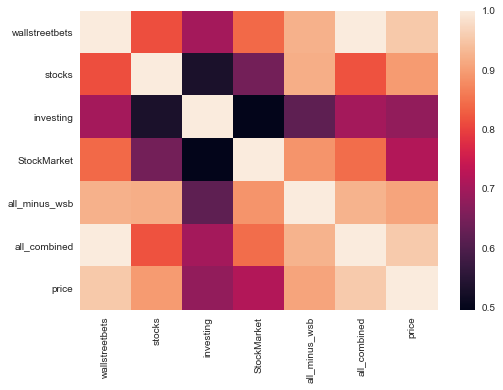

In [237]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sns.heatmap(amc.corr())

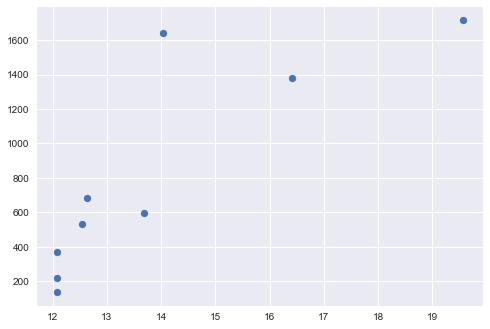

In [231]:
from matplotlib import pyplot as plt
plt.style.use('seaborn')
prices = list(amc['price'])
mentions = list(amc['all_combined'])

plt.scatter(prices,mentions)

In [72]:
#amc.to_csv('./data_for_tableau/amc.csv')

# Stats for GME

<AxesSubplot:>

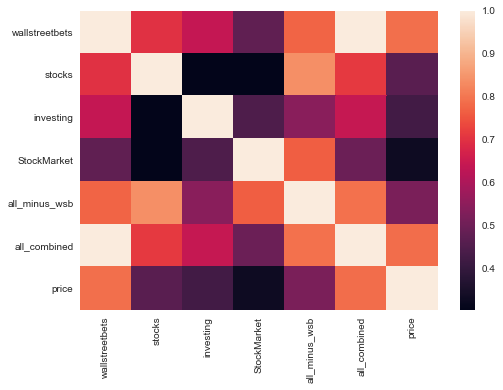

In [238]:
gme = get_stats('GME')
gme['date']= pd.to_datetime(gme['date'])
gme = gme.sort_values('date')
gme.set_index('date')
gme.corr()


In [83]:
gme.to_csv('./data_for_tableau/gme.csv')

# Stats for AAPL

In [212]:
aapl = get_stats('AAPL')
aapl['date']= pd.to_datetime(aapl['date'])
aapl.drop(11, axis=0,inplace=True)
aapl.drop(12, axis=0,inplace=True)
aapl.drop(13, axis=0,inplace=True)
aapl = aapl.sort_values('date')
aapl.set_index('date')
aapl


,date,wallstreetbets,stocks,investing,StockMarket,all_minus_StockMarket,all_minus_wsb,all_combined,price
4,2021-05-18,170,61.0,20.0,1.0,251.0,82.0,252.0,124.849998
3,2021-05-19,181,72.0,15.0,5.0,268.0,92.0,273.0,124.690002
0,2021-05-20,248,47.0,7.0,1.0,302.0,55.0,303.0,127.309998
2,2021-05-21,218,63.0,11.0,4.0,292.0,78.0,296.0,125.430000
9,2021-05-22,48,18.0,6.0,1.0,72.0,25.0,73.0,125.430000
10,2021-05-23,34,53.0,23.0,5.0,110.0,81.0,115.0,125.430000
1,2021-05-24,224,68.0,7.0,17.0,299.0,92.0,316.0,127.099998
5,2021-05-25,152,57.0,7.0,6.0,216.0,70.0,222.0,126.900002
8,2021-05-26,56,40.0,14.0,8.0,110.0,62.0,118.0,126.849998
7,2021-05-27,116,35.0,14.0,5.0,165.0,54.0,170.0,125.279999


In [213]:
aapl.to_csv('./data_for_tableau/aapl.csv')

# Stats for TSLA

In [222]:
tsla = get_stats('TSLA')
tsla['date']= pd.to_datetime(tsla['date'])
tsla = tsla.sort_values('date')
tsla.set_index('date')
tsla.corr()

,wallstreetbets,stocks,investing,StockMarket,all_minus_wsb,all_combined,price
wallstreetbets,1.000000,0.704536,0.052138,0.047731,0.490027,0.969173,-0.401653
stocks,0.704536,1.000000,0.505534,0.272478,0.906313,0.841400,-0.674567
investing,0.052138,0.505534,1.000000,0.053282,0.661340,0.230233,-0.391484
StockMarket,0.047731,0.272478,0.053282,1.000000,0.559794,0.197871,-0.087472
all_minus_wsb,0.490027,0.906313,0.661340,0.559794,1.000000,0.689693,-0.591923
all_combined,0.969173,0.841400,0.230233,0.197871,0.689693,1.000000,-0.500944
price,-0.401653,-0.674567,-0.391484,-0.087472,-0.591923,-0.500944,1.000000


# Stats for FORD

In [239]:
ford = get_stats('FORD')
ford['date']= pd.to_datetime(ford['date'])
ford.drop(11, axis=0,inplace=True)
ford.drop(12, axis=0,inplace=True)
ford.drop(13, axis=0,inplace=True)
ford = ford.sort_values('date')
ford.set_index('date')
ford

,date,wallstreetbets,stocks,investing,StockMarket,all_minus_wsb,all_combined,price
8,2021-05-18,98,9.0,5.0,5.0,19.0,117.0,2.44
9,2021-05-19,79,8.0,1.0,1.0,10.0,89.0,2.47
2,2021-05-20,220,128.0,3.0,5.0,136.0,356.0,2.83
0,2021-05-21,318,122.0,0.0,0.0,122.0,440.0,2.65
10,2021-05-22,42,13.0,2.0,1.0,16.0,58.0,2.65
4,2021-05-23,127,14.0,3.0,0.0,17.0,144.0,2.65
6,2021-05-24,111,8.0,3.0,4.0,15.0,126.0,2.53
7,2021-05-25,101,6.0,0.0,0.0,6.0,107.0,2.40
5,2021-05-26,120,38.0,2.0,3.0,43.0,163.0,2.44
1,2021-05-27,252,71.0,5.0,2.0,78.0,330.0,2.83


In [142]:
ford.to_csv('./data_for_tableau/ford.csv')

## Stats for total mentions in all data

In [204]:
total_mentions = pd.DataFrame()
for ticker in TICKERS:
    tickers = data[data['Organizations'].apply(lambda x: ticker in x)]
    h = tickers.shape
    total_mentions[ticker] = h

#total_mentions = total_mentions.T #transpose dataframe
#total_mentions.rename(columns = {0:'mentions'}, inplace = True)
#total_mentions.rename(columns = {1:'correlation coefficient'}, inplace = True)

#total_mentions.drop(1, axis=0,inplace=True)
total_mentions
#total_mentions.to_csv('./data_for_tableau/total_mentions.csv')

,AMC,GME,PLTR,AAPL,SPCE,AMZN,FORD,AMD,TSLA,ATH,NOK,ITM,AI,COIN
0,22301,17350,2654,2471,2189,2213,2155,1714,1362,1021,1008,847,627,617
1,8,8,8,8,8,8,8,8,8,8,8,8,8,8


In [171]:
tickers = data[data['Organizations'].apply(lambda x: 'AMC' in x)]
tickers.shape

(22301, 8)